<a href="https://colab.research.google.com/github/MohamedS-Siena/computational_physics/blob/main/Mohamed_Shahabuddeen_Lab08_Fourier_Transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

The basic idea of the fourier transform is that almost all functions can be written as the sum of cosine and sine functions.

The goal of today's lab is to develop some intuition for Fourier transforms.

We will do this by:

* making a wave that is the sum of 3 cosine functions.  We will then take Fourier transform of the summed wave and interpret the results.

* analyzing the number of sunspots versus time using a Fourier transform.


* determining the frequencies and harmonics that give different instruments their unique tone.


### Useful concepts from General Physics

* `frequency` is the number of cycles or waves per second.  Frequency is measured in units of Hertz = cycles/sec.
* `period` is the time needed to complete one cycle of the wave.  Period is measure in units of sec.

* `frequency` and `period` are inversely related:

$$ f = \frac{1}{T} $$



In [ ]:
# import numpy and matplotlib modules
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Summing cosine functions

(5 points)

The general form on a cosine function is:

$$ f(t) = A cos(\omega t + \phi) $$

Let's make a graph of 3 different cosine functions over the range $0 < t < 4$

* Create a time array that goes from $0 < t < 4$ with 100 steps
* Set the angular frequencies: $\omega = [\pi,2\pi,4\pi]$
* Set the amplitudes: $A = [0.5, 1, 0.75]$
* Set the phase shifts: $\phi = [\pi/2,\pi,3\pi/2]$
* Then graph the individual curves and the sum of the three cosine functions.

In [ ]:
# use linspace to set up time array called t
t = np.linspace(0,4,100)
# set up the three cosine curves
w = [np.pi,2*np.pi,4*np.pi]
A = [0.5,1,0.75]
phi = [np.pi/2,np.pi,3*np.pi/2]

f1 = A[0]*np.cos(w[0]*t+phi[0])
f2 = A[1]*np.cos(w[1]*t+phi[1])
f3 = A[2]*np.cos(w[2]*t+phi[2])

Text(0, 0.5, 'f(t)')

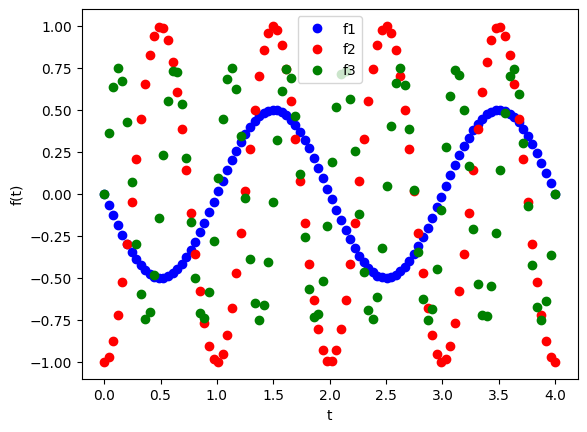

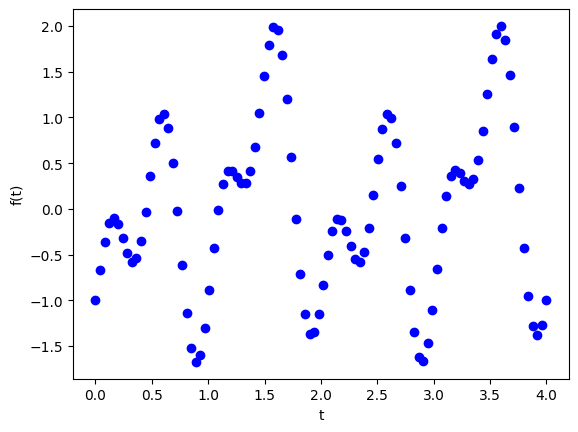

In [ ]:
# create your graph here
plt.figure()
plt.plot(t,f1,"bo",label="f1")
plt.plot(t,f2,"ro",label="f2")
plt.plot(t,f3,"go",label="f3")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.legend()

plt.figure()
plt.plot(t,f1+f2+f3,"bo")
plt.xlabel("t")
plt.ylabel("f(t)")

# Part 2: Compute the Fourier Transform of Your Summed Wave

(5 points)

* Use numpy's fft function to compute the Fourier transform of your summed wave.

* The tasks that we will use are

| Function | What it does |
|---|---|
|np.fft.rfft | returns the amplitudes of the fourier transform components of the input data, giving component frequencies that make up the input function |
| np.fft.rfftfreq | calculates frequency array that corresponds to the fourier transform amplitudes |
|np.fft.irfft | returns the inverse fourier transform, converting frequency data back to time data |


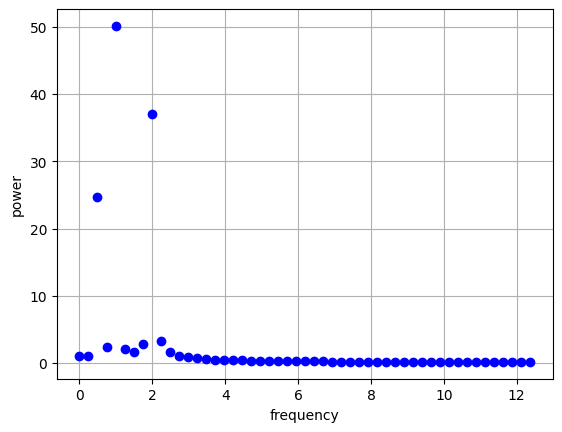

In [ ]:
# take the FFT of the summed wave by passing sumwave into np.fft.rfft
# save the output into the variable Y

Y = np.fft.rfft(f1+f2+f3)

# set power equal to the absolute value of Y
power = np.abs(Y)# the power

# set n equal to the length of the time array
n=len(t)

# calculate the time step between data points
dt = t[1]-t[0]

# use rfftfreq to get the array of frequencies
freq = np.fft.rfftfreq(n, d = dt)


# create a figure showing power versus frequency
# label the axes
# add a grid using plt.grid()

plt.figure()
plt.plot(freq,power,"bo")
plt.xlabel("frequency")
plt.ylabel("power")
plt.grid()

### Inverse Fourier Transform

* To illustrate the full process, we will use `irfft` to take the inverse fourier transform of `Y` and plot the results.

* The inverse fourier transform should return the original wave that we fed into `rfft`, so you will compare the result to `sumwave`.

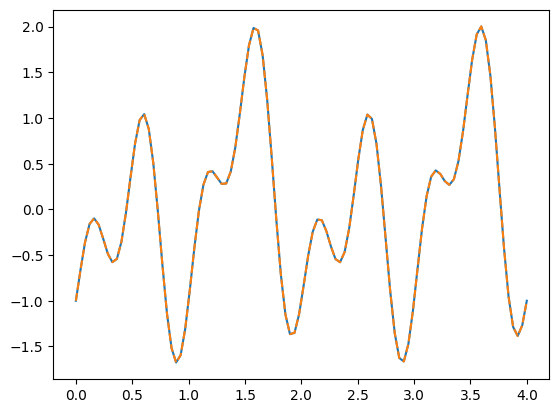

In [ ]:
# feed Y into irfft and set the result equal to Yinv
Yinv = np.fft.irfft(Y)

# create a plot that shows Yinv vs t
plt.figure()
plt.plot(t,Yinv)
# overplot sumwave vs t using a dashed line
plt.plot(t,f1+f2+f3,"--")

### **QUESTIONS**

(5 points)


* Which frequencies have a significant amplitude (coefficient > 0.10)?
* How do these frequecies relate to the frequencies of the three waves that you used to create ```sumwave```?

* How does the amplitude of the Fourier coefficients relate to the amplitude of the three cosine waves that were summed to create ```sumwave```?

**YOUR ANSWER HERE**

Frequencies of 0.5, 1, and 2.

The frequencies are equal to the periods of the three waves.

The amplitudes of the Fourier is 50x to the amplitudes of the three waves.

# Part 3: Analyzing the Periodicity in Sunspots

(5 points)

*Adapted from Newman, Computational Physics, Exercise 7.2*

The data file ```sunspots.txt``` has the observed number of sunspots for each month since January 1749!  

The file contains two columns of numbers: the month and the number of sunspots.

* Retrieve the file using wget
```!wget http://www-personal.umich.edu/~mejn/cp/data/sunspots.txt```
* Read in the file.  The following command should be useful:
```python
month, nspots = np.loadtxt(filename,unpack=True)
```
* Make a plot of the number of sunspots versus month.
* Estimate the period of the sunspot cycle from your graph.

**Enter your estimate of the period from the graph here.**

In [ ]:
# wget command here
!wget http://www-personal.umich.edu/~mejn/cp/data/sunspots.txt

--2025-03-31 19:07:51--  http://www-personal.umich.edu/~mejn/cp/data/sunspots.txt
Resolving www-personal.umich.edu (www-personal.umich.edu)... 141.211.243.103
Connecting to www-personal.umich.edu (www-personal.umich.edu)|141.211.243.103|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.websites.umich.edu/~mejn/cp/data/sunspots.txt [following]
--2025-03-31 19:07:51--  https://public.websites.umich.edu/~mejn/cp/data/sunspots.txt
Resolving public.websites.umich.edu (public.websites.umich.edu)... 141.211.243.103
Connecting to public.websites.umich.edu (public.websites.umich.edu)|141.211.243.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30244 (30K) [text/plain]
Saving to: ‘sunspots.txt.1’

sunspots.txt.1      100%[===================>]  29.54K  --.-KB/s    in 0.03s   

2025-03-31 19:07:51 (850 KB/s) - ‘sunspots.txt.1’ saved [30244/30244]



In [ ]:
# code to read in file
# save the month as month and the number of sunspots as nspots
month, nspots = np.loadtxt("sunspots.txt",unpack=True)

Text(0, 0.5, '# of sunspots')

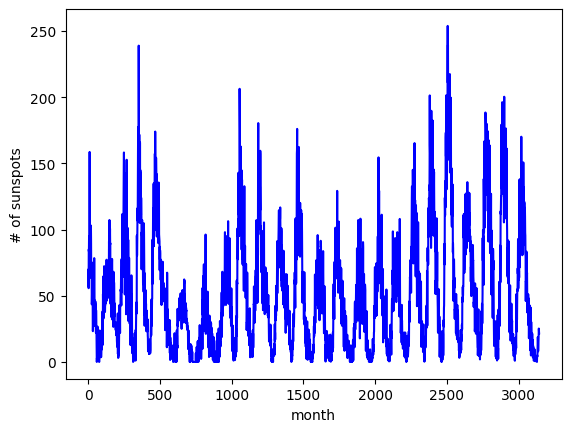

In [ ]:
# make your graph here
plt.plot(month,nspots,"b-")
plt.xlabel("month")
plt.ylabel("# of sunspots")

### Analyze the number of sunspots using a Fourier Transform

(5 points)

Use the `rft` function to analyze the periodicity of the number of sunspots.

Copy the code from Part 2 to convert the output of `rfft` to power and calculate the corresponding frequencies.  




In [ ]:
# run np.fft.rfft on nspots
Y = np.fft.rfft(nspots)


<ipython-input-33-edaba3cc6db3>:18: RuntimeWarning: divide by zero encountered in divide
  period = 1/freq/12


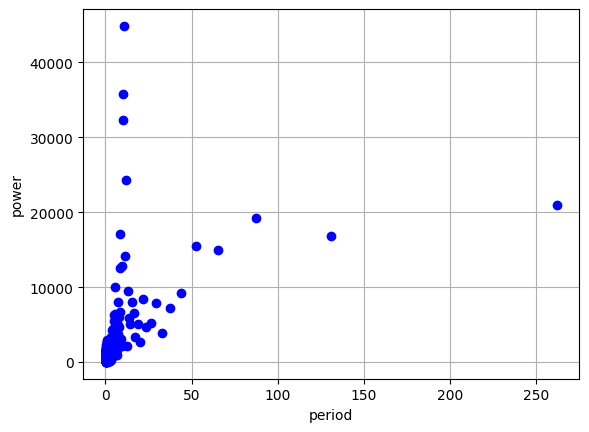

In [ ]:
# copy code from part 2 to convert the output of np.fft.rfft to power
# set power equal to the absolute value of Y
power = np.abs(Y)# the power

# set n equal to the length of the time array
n=len(month)

# calculate the time step between data points
dt = month[1]-month[0]

# use rfftfreq to get the array of frequencies
freq = np.fft.rfftfreq(n, d = dt)

# calculate the corresponding frequencies using np.fft.rfftfreq


# calculate the period corresponding to each frequency
period = 1/freq/12

# plot the power versus period, rather than versus frequency
plt.figure()
plt.plot(period,power,"bo")
plt.xlabel("period")
plt.ylabel("power")
plt.grid()

### **QUESTIONS**

The Fourier coefficients should indicate that there is one period that has a higher amplitude than the others.  
* Compare this period to the period you estimated from the graph of the number of sunspots versus time.  
* Compare your period with the known value.


**YOUR ANSWER HERE**

The period is equal between the two graphs.

The period of sunspots is 11 years, so the Fourier peak corresponds.

# Part 4: Build a square wave from cosine functions

(5 points)

Almost every wave can be represented as a series of sine/cosine functions.  In this part, you need to create a square wave by summing sine waves of various frequencies and amplitudes.  To create a square wave, the frequency and amplitudes of successive waves must decrease in a specific pattern.

The basics of what you should do are listed in the cell below.  You will need to play around with amplitudes and frequencies to get a result that look like a square wave.

Good luck!  And check your results with an instructor.

Hint: https://www.mathworks.com/help/matlab/math/square-wave-from-sine-waves.html

Text(0, 0.5, 'amplitude')

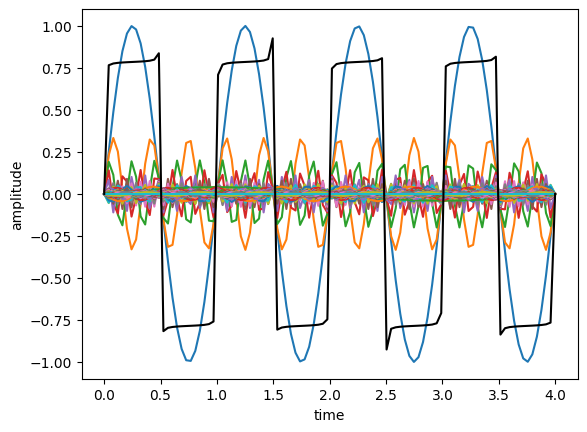

In [ ]:
T = 1# Period is 1 sec
a0 = 1 # no DC offset
w0 = 2*np.pi/T

# try adding 50 sine functions together
# let the frequency increase each time, and
# let the amplitude decrease as the frequency increases
sum=0
t = np.linspace(0,4,100)
plt.figure()
for i in range(1,100,2):
  # compute a new sine function
  f = np.sin(i*w0*t)/(a0*i)
  # plot the sine versus time
  plt.plot(t,f)
  # add the new function to the sum
  sum+=f

# plot the sumwave vs time
plt.plot(t,sum,"k-")
plt.xlabel("time")
plt.ylabel("amplitude")

# Part 5: Analyzing Sound of Musical Instruments

(5 points)

*from Newman, Computational Physics, Exercise 7.3*

* Use wget to download two sound files that represent the same note played on the piano and trumpet.
  * http://www-personal.umich.edu/~mejn/cp/data/piano.txt
  * http://www-personal.umich.edu/~mejn/cp/data/trumpet.txt

* The data files just include the intensity.  
* Plot both of the waveforms on the same figure with one column and two rows.




In [ ]:
# wget files
!wget http://www-personal.umich.edu/~mejn/cp/data/piano.txt
!wget http://www-personal.umich.edu/~mejn/cp/data/trumpet.txt

# load files
piano = np.loadtxt("piano.txt",unpack=True)
trumpet = np.loadtxt("trumpet.txt",unpack=True)

--2025-03-31 19:35:34--  http://www-personal.umich.edu/~mejn/cp/data/piano.txt
Resolving www-personal.umich.edu (www-personal.umich.edu)... 141.211.243.103
Connecting to www-personal.umich.edu (www-personal.umich.edu)|141.211.243.103|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.websites.umich.edu/~mejn/cp/data/piano.txt [following]
--2025-03-31 19:35:34--  https://public.websites.umich.edu/~mejn/cp/data/piano.txt
Resolving public.websites.umich.edu (public.websites.umich.edu)... 141.211.243.103
Connecting to public.websites.umich.edu (public.websites.umich.edu)|141.211.243.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 482300 (471K) [text/plain]
Saving to: ‘piano.txt.1’

piano.txt.1         100%[===================>] 471.00K  2.60MB/s    in 0.2s    

2025-03-31 19:35:34 (2.60 MB/s) - ‘piano.txt.1’ saved [482300/482300]

--2025-03-31 19:35:35--  http://www-personal.umich.edu/~mejn/cp/data/trumpet.txt
Resolvin

Text(0.5, 1.0, 'trumpet')

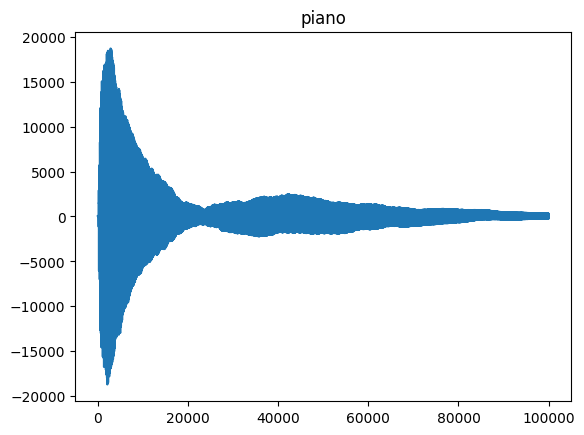

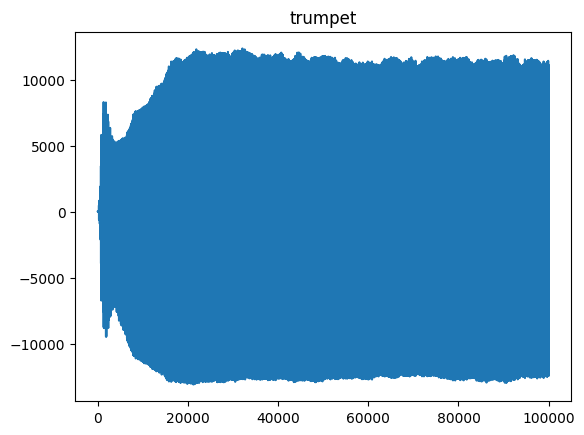

In [ ]:
# plot the waveforms
plt.figure()
plt.plot(piano)
plt.title("piano")
plt.figure()
plt.plot(trumpet)
plt.title("trumpet")

### Analyze the frequency spectrum

* Feed both the piano and trumpet files through the `rfft` function.

* Both waveforms were recorded at the industry standard rate of 44,100 samples per second.  This means we can calculate the time array as:

```python
timearr = np.arange(len(piano))/44100
```

* And the timestep is:
```python
dt = timearr[1] - timearr[0]
```

* You can then follow the examples above to calculate the frequency array.

* Plot the resulting fourier transforms in a figure with one row and two columns.


In [ ]:
# compute the Fourier transform of the piano data using rfft
# save the results as Ypiano
Ypiano = np.fft.rfft(piano)
# set Ppiano to the absolute value of Ypiano
Ppiano = np.abs(Ypiano)
# compute the Fourier transform of the trumpet data using rfft
# save the results as Ytrumpet
Ytrumpet = np.fft.rfft(trumpet)
# set Ptrumpet to the absolute value of Ytrumpet
Ptrumpet = np.abs(Ytrumpet)

Text(0, 0.5, 'power')

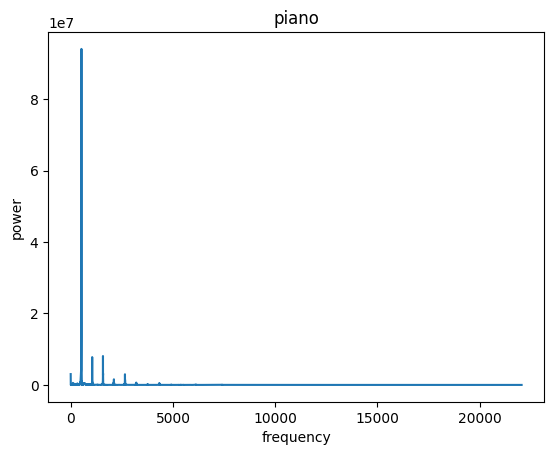

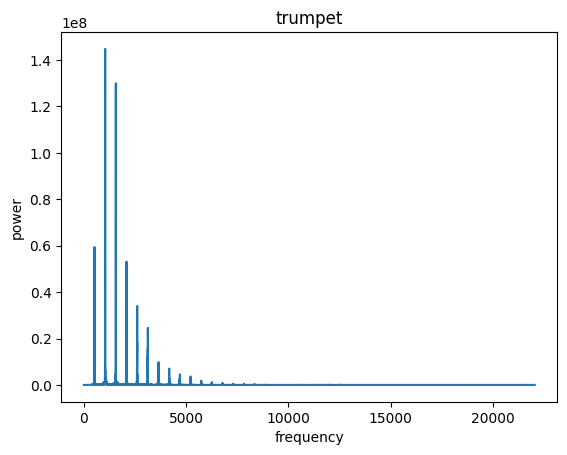

In [ ]:
# calculate the time array
timearr = np.arange(len(piano))/44100
# calculate dt
dt = timearr[1] - timearr[0]
# convert the output from rfft to a frequency spectrum
freq = np.fft.rfftfreq(len(timearr), d = dt)

# plot power vs frequency for piano
plt.figure()
plt.plot(freq,Ppiano)
plt.title("piano")
plt.xlabel("frequency")
plt.ylabel("power")
# plot power vs frequency for trumpet
plt.figure()
plt.plot(freq,Ptrumpet)
plt.title("trumpet")
plt.xlabel("frequency")
plt.ylabel("power")

### **QUESTIONS**

(5 points)

* Discuss what one can conclude about the sound of the trumpet and piano based on their frequency spectra.

* Both instruments are playing the same musical note.  From your Fourier transform results, calculate what note they were playing.  (Hint: the musical note middle C has a frequency of 261 Hz.

* Is the note in the audible range?  You can test your answer here: https://www.szynalski.com/tone-generator/

\\
Based on the power, the trumpet looks to be louder than the piano, the trumpet also has a more complex tone.

They are playing a B.

These notes are in the audible range.

### Some other cool things to explore

https://www.kaggle.com/code/davidbroberts/piano-triads